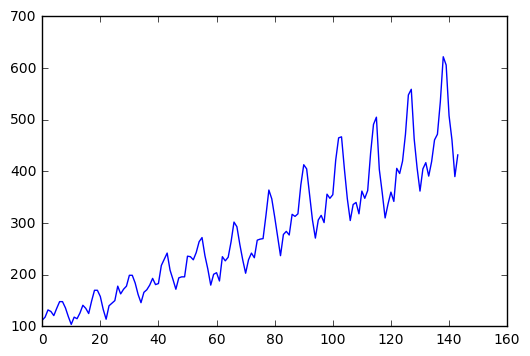

In [82]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('data/extras/notebooks/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [83]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [84]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [85]:
# load the dataset
dataframe = pandas.read_csv('data/extras/notebooks/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [86]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [87]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
    	a = dataset[i:(i+look_back), 0]
    	dataX.append(a)
    	dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [88]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [89]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [91]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=False)

In [92]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26.87 RMSE
Test Score: 69.59 RMSE


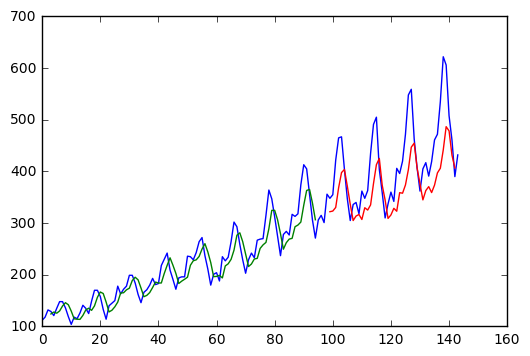

In [92]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [76]:
trainY[0]

array([ 129.00000163,  120.99999632,  135.00000368,  147.99999397,
        147.99999397,  136.00000531,  119.00000078,  103.99999952,
        117.99999916,  115.00000199,  125.99999674,  140.99999801,
        135.00000368,  125.00000283,  148.9999956 ,  169.99999891,
        169.99999891,  157.99999481,  133.00000042,  114.00000036,
        139.99999638,  145.00000452,  149.99999723,  177.9999965 ,
        163.00000295,  172.00000217,  177.9999965 ,  198.99999982,
        198.99999982,  184.00000627,  162.00000133,  146.00000615,
        165.9999924 ,  171.00000054,  179.99999976,  193.00000549,
        181.00000139,  183.00000464,  217.99999988,  230.00000398,
        241.99999264,  209.00000066,  191.00000223,  172.00000217,
        194.00000712,  195.99999493,  195.99999493,  235.99999831,
        234.99999668,  229.00000235,  242.99999427,  263.99999759,
        272.00001061,  236.99999994,  211.00000392,  179.99999976,
        201.00000308,  203.99999252,  187.99999735,  234.99999

Train Score: 26.87 RMSE
Test Score: 69.59 RMSE


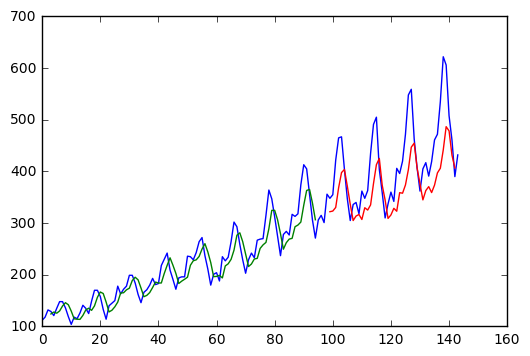

In [96]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('data/extras/notebooks/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=False)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1


2s - loss: 0.0040


Epoch 1/1


1s - loss: 0.0086
Epoch 1/1


1s - loss: 0.0055
Epoch 1/1


1s - loss: 0.0046
Epoch 1/1


1s - loss: 0.0044
Epoch 1/1


0s - loss: 0.0044
Epoch 1/1


1s - loss: 0.0045
Epoch 1/1


1s - loss: 0.0045
Epoch 1/1


1s - loss: 0.0044
Epoch 1/1


1s - loss: 0.0044
Epoch 1/1


1s - loss: 0.0044
Epoch 1/1


1s - loss: 0.0043
Epoch 1/1


1s - loss: 0.0043
Epoch 1/1


1s - loss: 0.0042
Epoch 1/1


0s - loss: 0.0042
Epoch 1/1


0s - loss: 0.0042
Epoch 1/1


0s - loss: 0.0041
Epoch 1/1


0s - loss: 0.0041
Epoch 1/1


0s - loss: 0.0041
Epoch 1/1


1s - loss: 0.0041
Epoch 1/1


1s - loss: 0.0040
Epoch 1/1


0s - loss: 0.0040
Epoch 1/1


0s - loss: 0.0040
Epoch 1/1


0s - loss: 0.0040
Epoch 1/1


0s - loss: 0.0039
Epoch 1/1


0s - loss: 0.0039
Epoch 1/1


0s - loss: 0.0039
Epoch 1/1


0s - loss: 0.0039
Epoch 1/1


0s - loss: 0.0039
Epoch 1/1


0s - loss: 0.0038
Epoch 1/1


0s - loss: 0.0038
Epoch 1/1


0s - loss: 0.0038
Epoch 1/1


1s - loss: 0.0038
Epoch 1/1


0s - loss: 0.0038
Epoch 1/1


0s - loss: 0.0038
Epoch 1/1


0s - loss: 0.0037
Epoch 1/1


0s - loss: 0.0037
Epoch 1/1


0s - loss: 0.0037
Epoch 1/1


0s - loss: 0.0037
Epoch 1/1


0s - loss: 0.0037
Epoch 1/1


0s - loss: 0.0037
Epoch 1/1


0s - loss: 0.0036
Epoch 1/1


1s - loss: 0.0036
Epoch 1/1


1s - loss: 0.0036
Epoch 1/1


1s - loss: 0.0036
Epoch 1/1


1s - loss: 0.0036
Epoch 1/1


1s - loss: 0.0036
Epoch 1/1


1s - loss: 0.0036
Epoch 1/1


1s - loss: 0.0035
Epoch 1/1


1s - loss: 0.0035
Epoch 1/1


1s - loss: 0.0035
Epoch 1/1


1s - loss: 0.0035
Epoch 1/1


1s - loss: 0.0035
Epoch 1/1


1s - loss: 0.0035
Epoch 1/1


1s - loss: 0.0034
Epoch 1/1


1s - loss: 0.0034
Epoch 1/1


1s - loss: 0.0034
Epoch 1/1


1s - loss: 0.0034
Epoch 1/1


1s - loss: 0.0034
Epoch 1/1


1s - loss: 0.0034
Epoch 1/1


1s - loss: 0.0034
Epoch 1/1


1s - loss: 0.0033
Epoch 1/1


1s - loss: 0.0033
Epoch 1/1


1s - loss: 0.0033
Epoch 1/1


1s - loss: 0.0033
Epoch 1/1


1s - loss: 0.0033
Epoch 1/1


0s - loss: 0.0033
Epoch 1/1


0s - loss: 0.0032
Epoch 1/1


0s - loss: 0.0032
Epoch 1/1


1s - loss: 0.0032
Epoch 1/1


1s - loss: 0.0032
Epoch 1/1


0s - loss: 0.0032
Epoch 1/1


1s - loss: 0.0032
Epoch 1/1


1s - loss: 0.0031
Epoch 1/1


1s - loss: 0.0031
Epoch 1/1


1s - loss: 0.0031
Epoch 1/1


1s - loss: 0.0031
Epoch 1/1


1s - loss: 0.0031
Epoch 1/1


1s - loss: 0.0031
Epoch 1/1


1s - loss: 0.0030
Epoch 1/1


0s - loss: 0.0030
Epoch 1/1


0s - loss: 0.0030
Epoch 1/1


0s - loss: 0.0030
Epoch 1/1


0s - loss: 0.0030
Epoch 1/1


1s - loss: 0.0030
Epoch 1/1


1s - loss: 0.0029
Epoch 1/1


1s - loss: 0.0029
Epoch 1/1


0s - loss: 0.0029
Epoch 1/1


0s - loss: 0.0029
Epoch 1/1


1s - loss: 0.0029
Epoch 1/1


1s - loss: 0.0029
Epoch 1/1


1s - loss: 0.0028
Epoch 1/1


1s - loss: 0.0028
Epoch 1/1


1s - loss: 0.0028
Epoch 1/1


1s - loss: 0.0028
Epoch 1/1


1s - loss: 0.0028
Epoch 1/1


0s - loss: 0.0028
Epoch 1/1


0s - loss: 0.0027
Epoch 1/1


0s - loss: 0.0027
Epoch 1/1


0s - loss: 0.0027


Train Score: 27.27 RMSE
Test Score: 65.34 RMSE


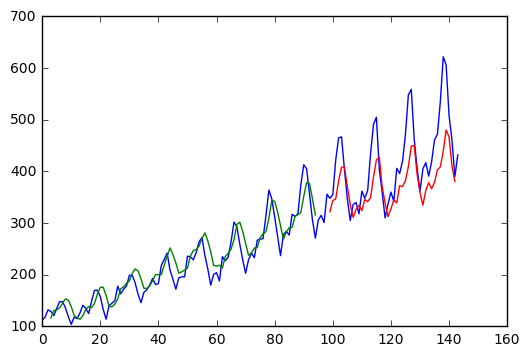

In [94]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('data/extras/notebooks/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=False, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Train Score: 24.82 RMSE
Test Score: 71.74 RMSE


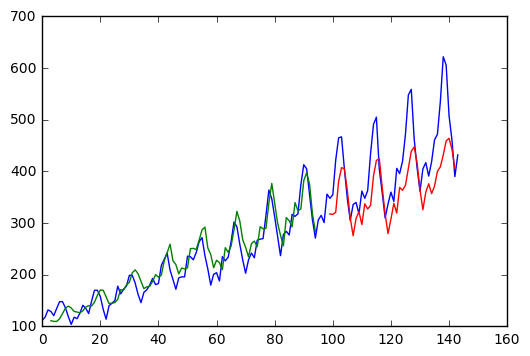

In [95]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('data/extras/notebooks/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=False, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()